In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Class Distribution:
 word
other          4462
Fernseher      2046
Schraube       2046
Lüftung        2045
Leitung        2045
nicht          2045
Ofen           2044
Licht          2044
Haus           2042
Radio          2042
wunderbar      2042
Alarm          2042
aus            2041
an             2041
Spiegel        2040
warm           2040
offen          2039
kann           2038
Staubsauger    2038
Brötchen       2038
Heizung        2036
Name: count, dtype: int64


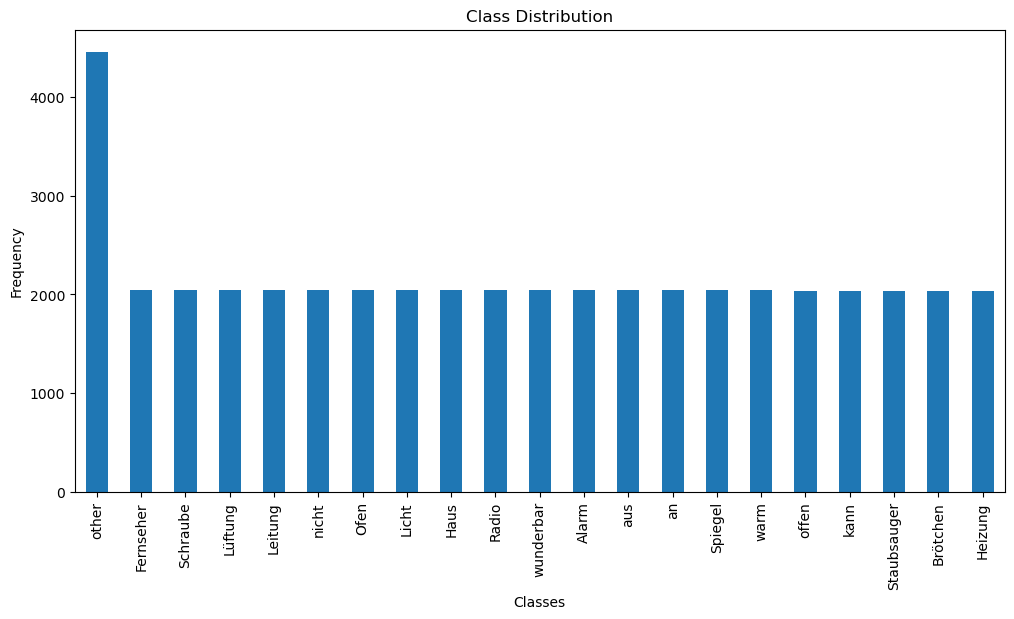

In [2]:
metadata = pd.read_csv('metadata/development.csv')

class_distribution = metadata['word'].value_counts()
print("Class Distribution:\n", class_distribution)

plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


In [8]:
data = np.load('development_numpy/development.npy', allow_pickle=True)
n_samples, n_features, n_time = data.shape
data.shape

(45296, 175, 44)

Original data shape: (45296, 175, 44)
Reshaped data shape: (45296, 7700)
Training data shape: (31707, 7700)
Test data shape: (13589, 7700)
Resampled training data shape: (65583, 7700)
Scaled training data shape: (65583, 7700)
Scaled test data shape: (13589, 7700)
Feature importances shape: (7700,)
Aggregated feature importances shape: (175,)
Selected feature indices: [  0   1   9  10  11  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  51  53  54  55  56  57  58  59  62  63  64  66  76  77  78  79
  80 108 109 110 111 112 114 140 141 142 143 144 172 173 174]
Selected training data shape: (65583, 3036)
Selected test data shape: (13589, 3036)
Selected Features Names: ['bandwidth_0', 'centroid_0', 'energy_0', 'flatness_0', 'flux_0', 'melspect_1', 'melspect_2', 'melspect_3', 'melspect_4', 'melspect_5', 'melspect_6', 'melspect_7', 'melspect_8', 'melspect_9', 'melspect_10', 'melspect_11', 'melspect_12', 'me

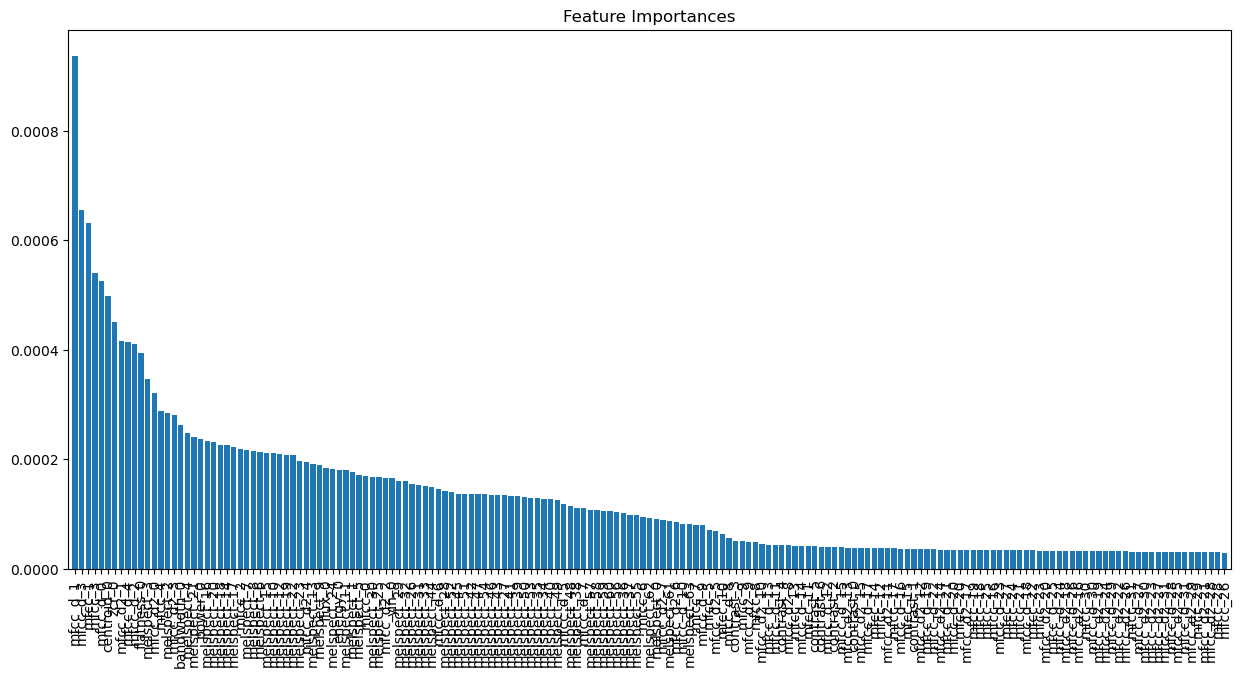

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

feature_names_df = pd.read_csv('metadata/idx_to_feature_name.csv')
feature_names = feature_names_df['feature_name'].tolist()
data = np.load('development_numpy/development.npy', allow_pickle=True)
metadata = pd.read_csv('metadata/development.csv')


labels = metadata['word'].values

print("Original data shape:", data.shape)

n_samples, n_features, n_time = data.shape
X = data.reshape(n_samples, n_features * n_time)
print("Reshaped data shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled training data shape:", X_train_resampled.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train_scaled, y_train_resampled)

print("Feature importances shape:", feature_selector.feature_importances_.shape)

importances = feature_selector.feature_importances_.reshape(n_features, n_time).mean(axis=1)
print("Aggregated feature importances shape:", importances.shape)

sfm = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=-np.inf)
sfm.fit(X_train_scaled[:, :n_features], y_train_resampled)
selected_features = np.where(importances >= np.mean(importances))[0]
print("Selected feature indices:", selected_features)

mask = np.zeros(n_features * n_time, dtype=bool)
for feature in selected_features:
    mask[feature*n_time:(feature+1)*n_time] = True

X_train_important = X_train_scaled[:, mask]
X_test_important = X_test_scaled[:, mask]

print("Selected training data shape:", X_train_important.shape)
print("Selected test data shape:", X_test_important.shape)

selected_feature_names = [feature_names[i] for i in selected_features]
print("Selected Features Names:", selected_feature_names)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.show()


Top 15 Features: ['mfcc_d_1' 'mfcc_d_3' 'mfcc_1' 'mfcc_3' 'mfcc_d_0' 'centroid_0' 'zcr_0'
 'mfcc_d2_1' 'mfcc_d_4' 'mfcc_d_2' 'flatness_0' 'melspect_3' 'mfcc_d2_0'
 'mfcc_4' 'melspect_2']


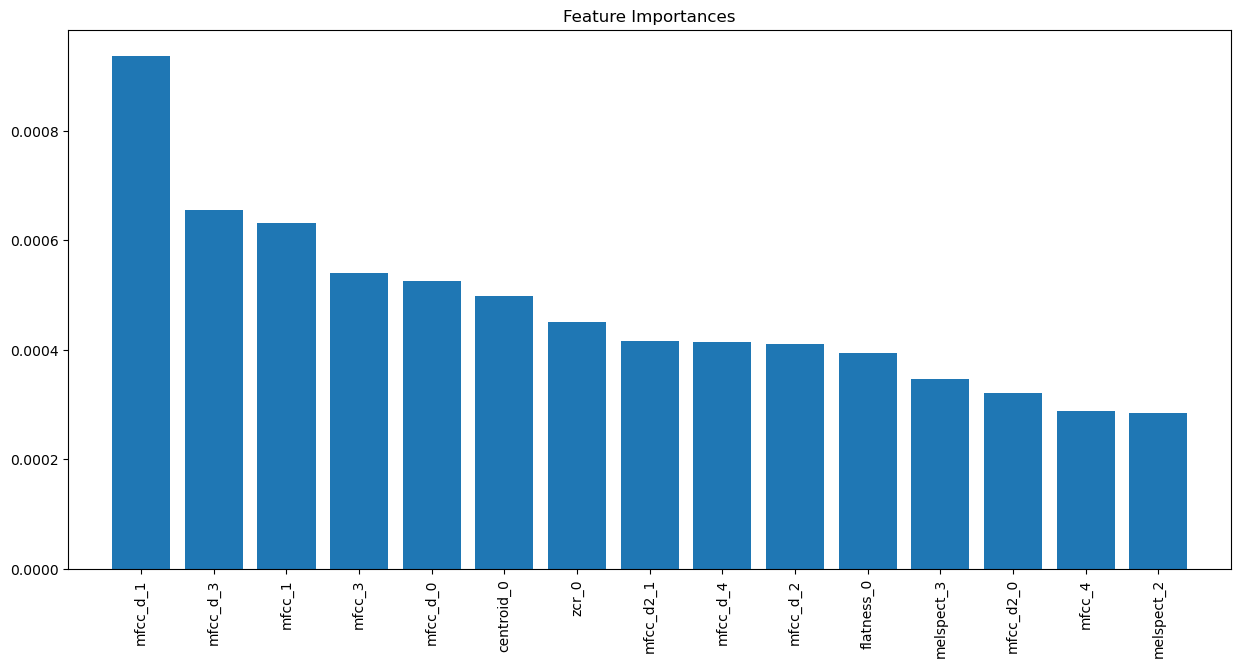

In [23]:
indices = np.argsort(importances)[::-1][:15]

print("Top 15 Features:", np.array(feature_names)[indices])

plt.figure(figsize=(15, 7))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.show()